In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read Data

In [3]:
train_data = pd.read_csv("../data/complete_responses.csv")
test_data = pd.read_csv("../data/survery_incomplete.csv")

In [4]:
train_data.head()

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0


# EDA

In [5]:
numerical_cols = ["salary", "age", "credit"]
categorical_cols = ["elevel", "car", "zipcode"]
target_col = ["brand"]

## Stats Summary

In [6]:
len(train_data)

9898

In [7]:
145211.572531/249175.966620

0.5827671685225226

In [8]:
train_data[numerical_cols].describe()

# Salary
## std almost half of the mean (44.4%), data is widely spread / high variability
## with high variability potentially has extreme values or outliers
## (can be seen by max value is almost double the mean and min value is fourth of the mean value)

# Age
## has tighther std (34% of the mean)
## need to check distribution as min and max values are considerably big

# Credit
## std more than half of the mean (58.2%), high variability
## min value is 0 and max values double the mean

,salary,age,credit
count,9898.000000,9898.000000,9898.000000
mean,84870.862257,49.778642,249175.966620
std,37712.340836,17.596685,145211.572531
min,20000.000000,20.000000,0.000000
25%,52082.106040,35.000000,120806.813900
50%,84949.735155,50.000000,250607.146100
75%,117162.043375,65.000000,374639.701800
max,150000.000000,80.000000,500000.000000


In [9]:
freq_counts = train_data[categorical_cols].apply(pd.value_counts)
mode_values = train_data[categorical_cols].mode()

In [10]:
freq_counts

# elevel
## nothing suspicious, almost evenly distributed with `Less than highschool degree` have more data
## worth to check the distribution on each level to all the non target columns

# car
## same as elevel, almost evenly distributed to all car types

# zipcode
## same as elevel and car, almost evenly distributed

,elevel,car,zipcode
0,2052.0,NaN,1085.0
1,1948.0,492.0,1053.0
2,1983.0,509.0,1112.0
3,1947.0,488.0,1080.0
4,1968.0,479.0,1087.0
5,NaN,505.0,1108.0
6,NaN,477.0,1155.0
7,NaN,495.0,1083.0
8,NaN,511.0,1135.0
9,NaN,487.0,NaN


In [11]:
mode_values

,elevel,car,zipcode
0,0,15,6


## Check Missing Values

In [12]:
train_data.isna().sum()

# no missing value, nothing to worry about

salary     0
age        0
elevel     0
car        0
zipcode    0
credit     0
brand      0
dtype: int64

## Check Imbalance Target

In [13]:
train_data[target_col].value_counts()

# TODO: to prevent bias in the model due to imbalance we will experiment on:
# 1. SMOTE (synthetic minority oversampling technique) approach
# 2. 2-phase learning, first phase with undersampling and second phase with as is data

brand
1        6154
0        3744
Name: count, dtype: int64

## Visualization

### Target: Brand

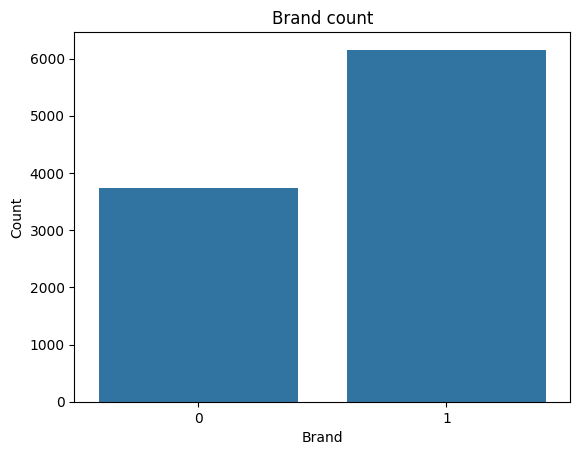

In [14]:
sns.countplot(train_data, x='brand')
plt.title("Brand count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

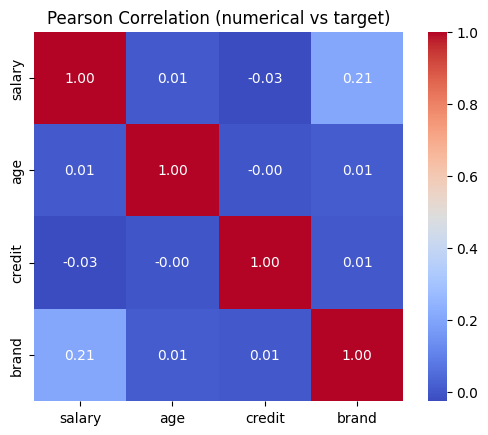

In [15]:
correlation_matrix = train_data[numerical_cols + target_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, vmax=1.0)
plt.title('Pearson Correlation (numerical vs target)')
plt.show()

# salary has the highest correlation with brand meanwhile age and credit is close to no correlation
# TODO: more inspection on salary column

### Salary

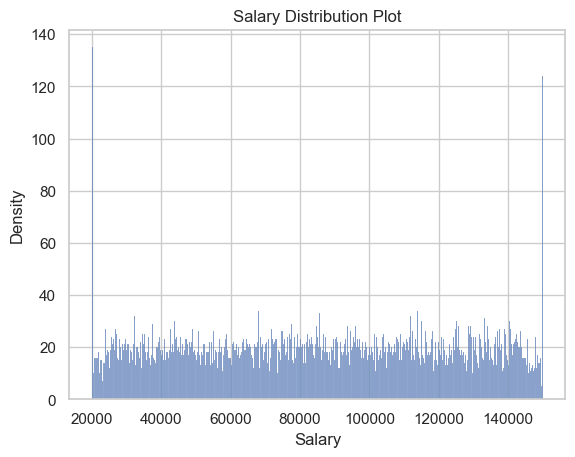

salary
20000.00000     129
150000.00000    115
119806.54480      1
74359.37273       1
126616.00690      1
               ... 
32145.62607       1
62694.03085       1
94811.30248       1
141276.36010      1
96430.16419       1
Name: count, Length: 9656, dtype: int64

In [16]:
sns.set_theme(style="whitegrid")
sns.histplot(train_data["salary"], bins=500)
plt.xlabel("Salary")
plt.ylabel("Density")
plt.title("Salary Distribution Plot")
plt.show()

train_data["salary"].value_counts()

# only 20k and 150k that have multiple input, makes it hard to indicate this column as a numerical cols
# TODO: find the balance and transform the data to categorical. can differ the salary category to 4 levels by leveraging the stats summary
# x < q1: low income
# q1 <= x <= q2: mid-low income
# q2 < x <= q3: mid-high income
# x > q3: high income

### Age

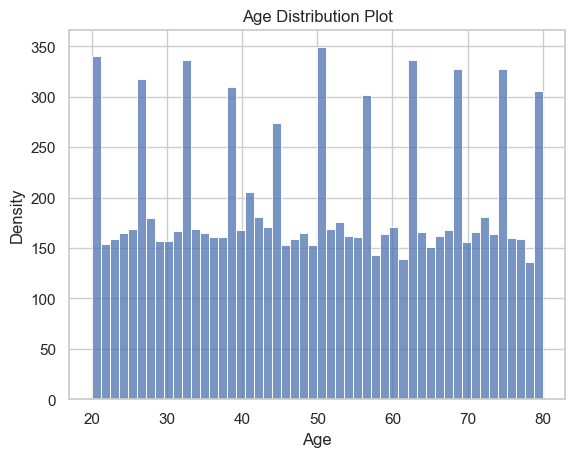

age
20    242
41    205
80    201
62    193
51    182
     ... 
39    137
78    136
44    133
79    105
21     98
Name: count, Length: 61, dtype: int64

In [17]:
sns.set_theme(style="whitegrid")
sns.histplot(train_data["age"], bins=50)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution Plot")
plt.show()

train_data["age"].value_counts()

# there is no suspicious data input like we encounter in salary
# we can keep going use the age as numerical feature

### Credits

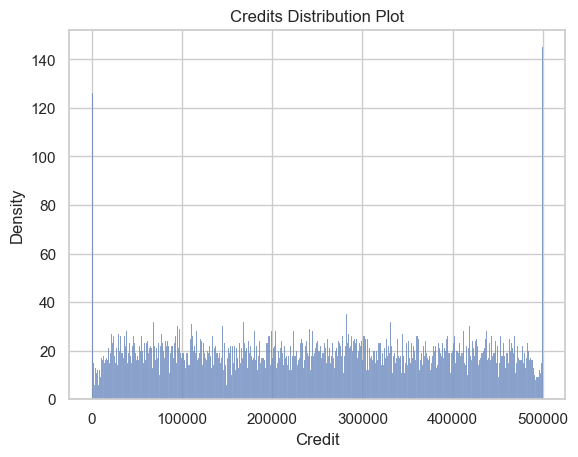

credit
500000.00000    129
0.00000         119
55744.23774       1
420447.47510      1
453704.52500      1
               ... 
421469.91670      1
346927.48280      1
470081.78830      1
326678.79380      1
224029.80700      1
Name: count, Length: 9652, dtype: int64

In [18]:
sns.set_theme(style="whitegrid")
sns.histplot(train_data["credit"], bins=500)
plt.xlabel("Credit")
plt.ylabel("Density")
plt.title("Credits Distribution Plot")
plt.show()

train_data["credit"].value_counts()

# similar to salary, there is input behavior needs to take into account
# TODO: apply the same strategy as salary with special care on 0 credit
# x = 0 -> no credit
# 0 < x < q1 -> low credit
# q1 <= x <= q2 -> med-low credit
# q2 < x <= q3 -> med-high credit
# x > q3 -> high credit

# Summary

- **sampling**: train and test data have been divided by data provider, no need to do data splitting
- **labeling**: from all 6 independent features, `car` is the very unlikely data to capture in real-life scenario, the target label is strong natural label as we can imagine someone who come to a laptop store directly select the laptop and whatever brand they pick will be recorded (don't need to set a feedback loop to user)
- **class imbalance**: can be categorized as `natural imbalance problem`, to handle this we will experimenting on 2 approaches which are SMOTE and 2-phase learning
- **missing values**: no missing data
- **scaling**: no scaling approach to be done (2 numerical features will be converted to categorical features leaving only 1 numerical feature `age`)
- **discretization of numerical feature**: `salary` and `credit` will be converted to categorical feature 
- **encoding categorical feature**: all categorical features will be one-hot encoded
- **feature crossing**: none

Model that will be used for this case is **XGBoost**